# Blackboard

In [1]:
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [2]:
class Deck(object):
    
    def __init__(self, numbers, seeds):
        self.n, self.s = numbers, seeds
        self.shuffle()
        self.counter = defaultdict(lambda: 0)
                
    def shuffle(self):
        self.deck = []
        for num in self.n:
            for seed in self.s:
                self.deck.append((num, seed))
    
    def serve(self, cards=5, reinsert=True):
        hand = [self.deck[x] for x in 
            np.random.choice(range(len(self.deck)), 
                             cards, replace=False)]
        if not reinsert:
            self.deck = [x for x in self.deck if x not in hand]
        return hand
    
    def run_test(self, iterations):
        for i in range(iterations):
            h = self.serve(reinsert=True)
            self.counter[Deck.comb(h)] += 1
    
    @staticmethod
    def comb(hand):
        numbers = [x for x, y in hand]
        return tuple([y for x, y in Counter(numbers).most_common()])


In [4]:
n, s = range(1, 14), ['C', 'Q', 'F', 'P']
d = Deck(n, s)

In [5]:
results = []
for i in range(100):
    d = Deck(n, s)
    d.run_test(5000)
    c_map = [(1, 1, 1, 1, 1), (2, 1, 1, 1), (2, 2, 1), (3, 1, 1), (3, 2), 
             (4, 1)]
    res = np.zeros(len(c_map))
    for k, v in d.counter.items():
        res[c_map.index(k)] = v
    results.append(res / res.sum())
M = np.array(results)

In [8]:
c = (2, 2, 1)
i = c_map.index(c)
i_r = M[:,i]

81 0.047850000000000004 0.0032312691005238177


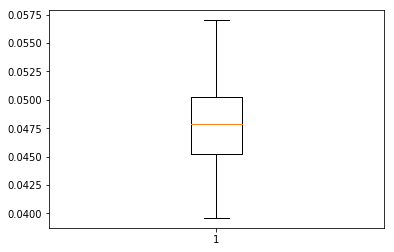

In [13]:
print (np.argmax(i_r), i_r.mean(), i_r.std())
plt.boxplot(i_r)
plt.show()